In [132]:
"""
@author: maximefontana
"""
# System
import sys

# Graph Data
import snap
import networkx as nx

# Scientific Computing 
import numpy as np
import scipy
import pandas as pd

# Math
import random as ran
from time import time

# Custom imports
%run Algorithms.ipynb
%run ClusteringEvaluation.ipynb
%run PlotFunctions.ipynb
%run GroundTruthGen.ipynb
%run SBM.ipynb

# Specific models
from sklearn.cluster import SpectralClustering, KMeans
from sklearn import metrics

# Plotting
#import tensorflow as tf
from matplotlib import pyplot as plt

[{0, 1, 2, 5, 6, 7}, {8, 9, 3, 4}]


In [133]:
#pip install networkx==2.5

### Synthetic Data Analysis

In this section, we will aim at replicating the results that Kleindessner et.al managed to perform in their paper. We will implement most of the conclusions they came across.

It is important to highlight a specific point, the algorithms implemented in the paper referred to as algorithm 2/3, those 'fair' clustering algorithms present specificities. Indeed, upon a specific theorem, as well as a specific number of samples, algorithm 2 fails to recover a user-set ground-truth where algorithm 3 successfully retrieves it at the expense of a higher running time.

#### 1. Theorem satisfied

In [134]:
## Be careful! This cell will take several hours to run!

#test1, USC_score, Fair_USC_score = get_averaged_tests_55(4, 0.2, 0.15, 0.1, 0.05)
#test2, algo1run2, algo2run2 = get_averaged_tests_55(4, 0.4, 0.3, 0.2, 0.1)
#test3, algo1run3, algo2run3 = get_averaged_tests_55(4, 0.3, 0.2, 0.15, 0.1)

#test2, USC_scor2, Fair_USC_score2 = get_averaged_tests_55(4, 0.4, 0.3, 0.2, 0.1)
#test2, algo1run2, algo2run2 = get_averaged_tests_55(4, 0.2, 0.15, 0.1, 0.05)
#test3, algo1run3, algo2run3 = get_averaged_tests_55(4, 0.3, 0.2, 0.15, 0.1)

<ipython-input-135-c000a3216a0e>:23: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=6)


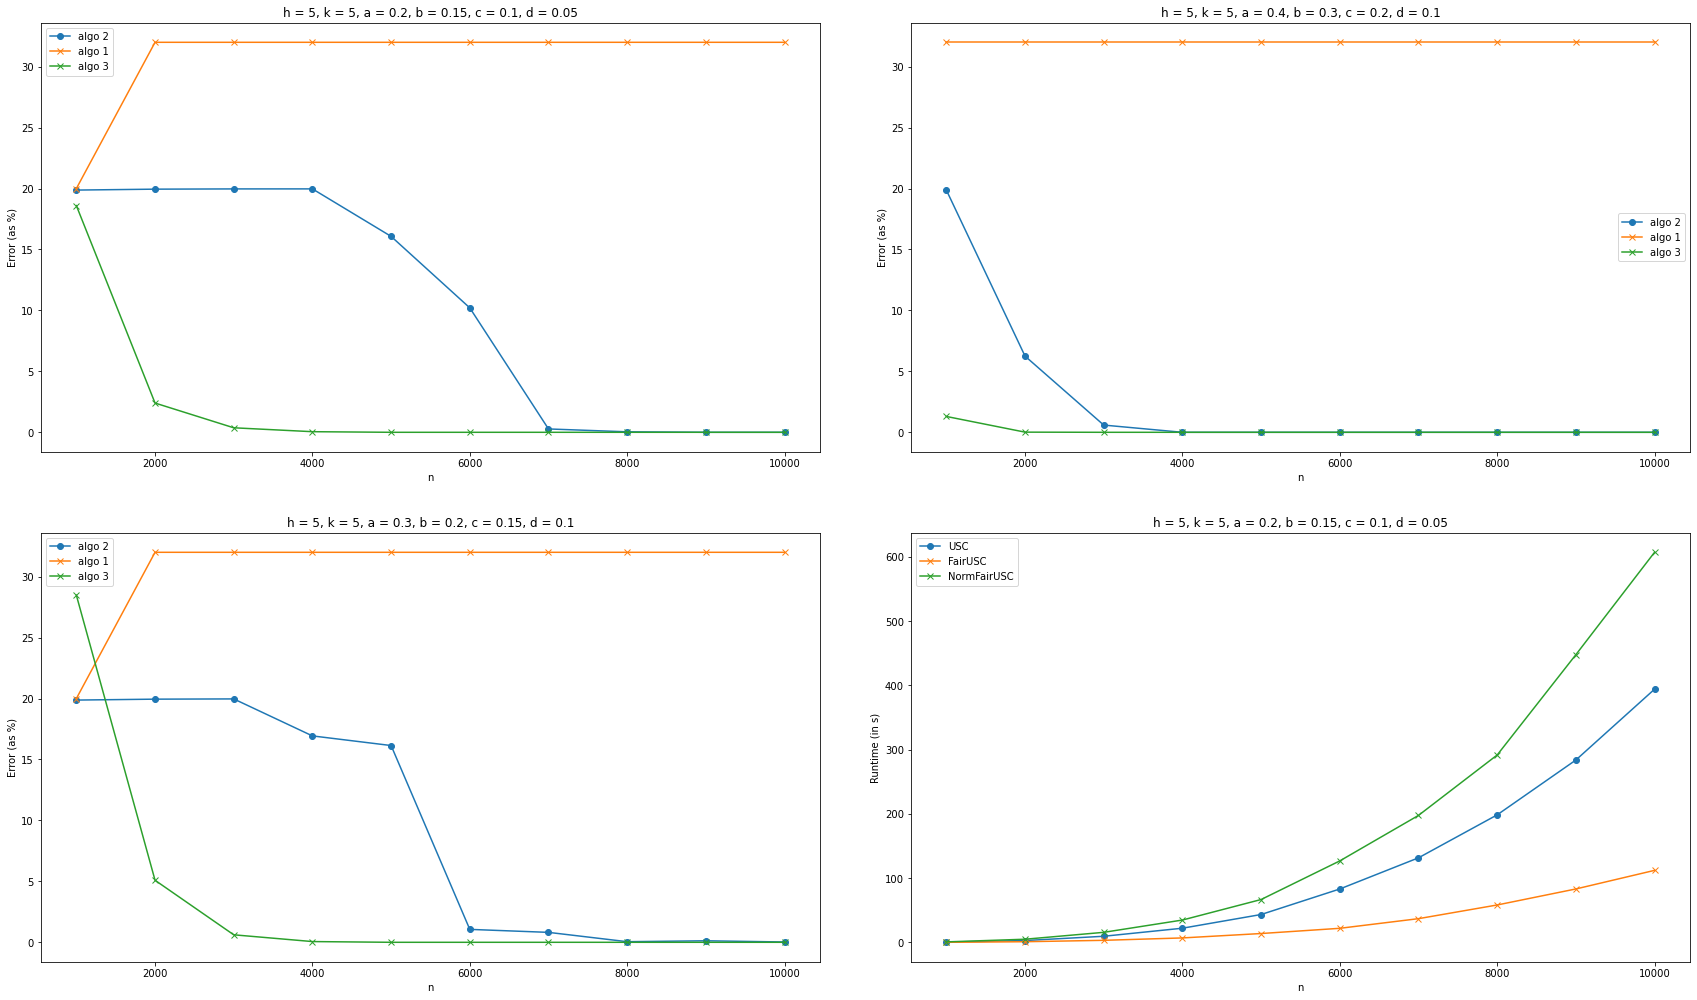

In [135]:
# This part is hard-coded as variables got from hours-long algorithms were not 
# individually stored properly! However! The results were kept and are correct and were
# actually computed from my algorithms in the commands in the cell above!

# algo 2 curves
test1 = [19.875, 19.95, 19.97, 19.9725, 16.075,  10.21, 0.275,  0.04, 0., 0.]
test1_algo3 = [1.3, 0.0125, 0, 0, 0, 0, 0, 0, 0, 0]
test2 = [19.875, 6.25, 0.5925,  0., 0., 0., 0., 0., 0., 0.]
test2_algo3 = [18.6, 2.4, 0.37, 0.05, 0, 0, 0, 0, 0, 0]
test3 = [19.875, 19.95,  19.97,  16.935, 16.145,  1.06,   0.815,  0.05,   0.125,  0.025]
test3_algo3 = [28.48, 5.09, 0.615, 0.06, 0, 0, 0, 0, 0, 0]
USC_score = [ 0.54617465,   2.93992597,   9.60373455,  22.13490546,  43.46908695,
  83.1985209,  131.71047473, 198.59189975, 283.93881142, 394.21269351]
Fair_USC_score = [  0.20511776,   1.10660887,   3.28844804,   7.00502759,  13.86039871,
  21.98830396,  37.00142068,  58.29770422,  83.24058729, 112.19232947]
Norm_Fair_USC_score = [0.85, 5.00, 15.72, 34.86, 66.8, 126.92, 197.74, 291.79, 447.94, 607.34]

# algo 1 curve
test4 = [20, 32, 32, 32, 32, 32, 32, 32, 32, 32]
test5 = [32, 32, 32, 32, 32, 32, 32, 32, 32, 32]

fig, axs = plt.subplots(2, 2, figsize=(25,15), constrained_layout=True)
fig.tight_layout(pad=6)
x = np.arange(1000, 11000, 1000)


axs[0, 0].plot(x, test1, label="algo 2", marker='o')
axs[0, 0].plot(x, test4, label="algo 1", marker='x')
axs[0, 0].plot(x, test2_algo3, label="algo 3", marker='x')
axs[0, 0].set_title('h = 5, k = 5, a = 0.2, b = 0.15, c = 0.1, d = 0.05')

axs[0, 1].plot(x, test2, label="algo 2", marker='o')
axs[0, 1].plot(x, test5, label="algo 1", marker='x')
axs[0, 1].plot(x, test1_algo3, label="algo 3", marker='x')
axs[0, 1].set_title('h = 5, k = 5, a = 0.4, b = 0.3, c = 0.2, d = 0.1')

axs[1, 0].plot(x, test3, label="algo 2", marker='o')
axs[1, 0].plot(x, test4, label="algo 1", marker='x')
axs[1, 0].plot(x, test3_algo3, label="algo 3", marker='x')
axs[1, 0].set_title('h = 5, k = 5, a = 0.3, b = 0.2, c = 0.15, d = 0.1')

axs[1, 1].set_title('h = 5, k = 5, a = 0.2, b = 0.15, c = 0.1, d = 0.05')
axs[1, 1].plot(x, USC_score, label="USC", marker='o')
axs[1, 1].plot(x, Fair_USC_score, label="FairUSC", marker='x')
axs[1, 1].plot(x, Norm_Fair_USC_score, label="NormFairUSC", marker='x')
#axs[1, 1].plot(x, n_power_3, label="n^3", marker='x')


plt.setp(axs[:], xlabel='n')
plt.setp(axs[:], ylabel='Error (as %)')
plt.setp(axs[1,1], ylabel='Runtime (in s)')

axs[0,0].legend(loc=0)
axs[1, 1].legend(loc=0)
axs[0, 1].legend(loc=0)
axs[1, 0].legend(loc=0)

In [136]:
test1_algo3_35, USC_score1_algo2_35, Fair_USC_score_1_algo2_35 = get_averaged_tests_35(4, 0.4, 0.3, 0.2, 0.1)

Isolated Vertices?  False
Run : 1 . Score : 28.8 . For n =  1000 . USC : 0.64 . FairUSC : 1.03
Isolated Vertices?  False
Run : 1 . Score : 28.95 . For n =  2000 . USC : 3.53 . FairUSC : 6.39
Isolated Vertices?  False
Run : 1 . Score : 29.0 . For n =  3000 . USC : 11.37 . FairUSC : 23.18
Isolated Vertices?  False
Run : 1 . Score : 29.0 . For n =  4000 . USC : 28.74 . FairUSC : 50.36
Isolated Vertices?  False
Run : 1 . Score : 28.94 . For n =  5000 . USC : 53.75 . FairUSC : 84.75


KeyboardInterrupt: 

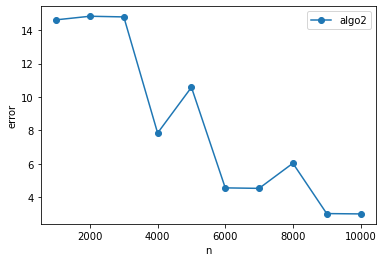

In [137]:
# Over 8 runs
# k = 3, h = 5
# For some reason, this model does not work well with algo 3
test_1_35_r = [14.625, 14.84, 14.80, 7.845, 10.585, 4.56, 4.53, 6.035, 3.02, 3]
x = np.arange(1000, 11000, 1000)

plt.plot(x, test_1_35_r, label = 'algo2', marker='o')
plt.xlabel('n')
# Set the y axis label of the current axis.
plt.ylabel('error')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

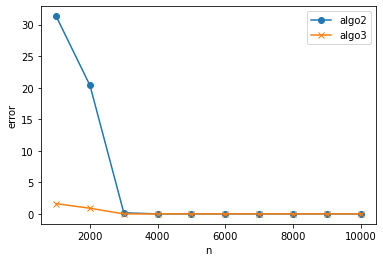

In [138]:
### k = 2, h = 2
#test1_22, USC_score1_22, Fair_USC_score_1_22 = get_averaged_tests_22(4, 0.2, 0.15, 0.1, 0.05)
test_1_22_r = [31.32, 20.35, 0.18, 0, 0, 0, 0, 0, 0, 0]
test_norm_fair_r = [1.625, 0.9, 0, 0, 0, 0, 0, 0, 0, 0]
x = np.arange(1000, 11000, 1000)

plt.plot(x, test_1_22_r, label = 'algo2', marker='o')
plt.plot(x, test_norm_fair_r, label = 'algo3', marker='x')
plt.xlabel('n')
# Set the y axis label of the current axis.
plt.ylabel('error')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

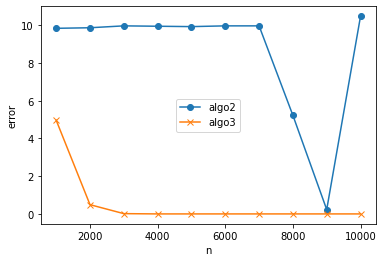

In [139]:
### k = 5, h = 3
#test1_53, USC_score1_53, Fair_USC_score_1_53 = get_averaged_tests_53(4, 0.4, 0.3, 0.2, 0.1)

test_1_53_r = [9.84, 9.87, 9.97, 9.95, 9.93, 9.97, 9.97, 5.225, 0.23, 10.48]
test_norm_fair_53_r = [4.97, 0.49, 0.015, 0, 0, 0, 0, 0, 0, 0]
x = np.arange(1000, 11000, 1000)

plt.plot(x, test_1_53_r, label = 'algo2', marker='o')
plt.plot(x, test_norm_fair_53_r, label = 'algo3', marker='x')
plt.xlabel('n')
# Set the y axis label of the current axis.
plt.ylabel('error')
# Set a title of the current axes.
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()